In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

## Fetch the dataset and show a quick overview of the attributes

In [ ]:
california = fetch_california_housing()

dataset = pd.DataFrame(california.data, columns=california.feature_names)
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
#include the target column for easy correlation of target to other features
dataset['target'] = california.target
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
#pearson correlation to see how the field correlate #panda library
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


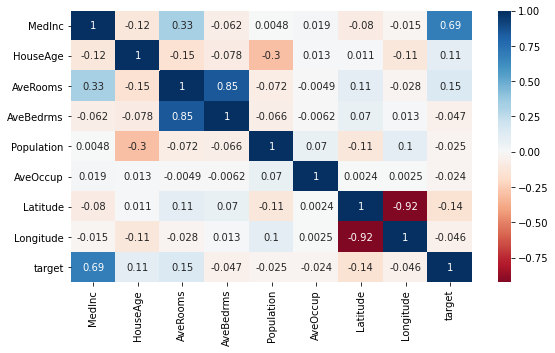

In [ ]:
#heatmap of correlation
plt.figure(figsize = (9,5))
sns.heatmap(dataset.corr(), cmap='RdBu', center=0, annot=True)

### for single variable

In [ ]:
#reshape the X
X = observations = len(dataset)
X = dataset['MedInc'].values.reshape((observations,1))
y = dataset.target
X

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

### for Multi variable

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.target
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

# Train Test Model

In [ ]:
#split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) #randomizes the dataset and 42 ensures the result is the same if ran several times.

In [ ]:
#confirm the shape
X_train.shape, y_train.shape

((16512, 8), (16512,))

In [ ]:
X_test.shape, y_test.shape

((4128, 8), (4128,))

In [ ]:
#instansiate the lineaerRegression model class
linear_regression = LinearRegression()

In [ ]:
#train the model and check time performance
%%time
linear_regression.fit(X_train,y_train)

CPU times: user 8.22 ms, sys: 5.09 ms, total: 13.3 ms
Wall time: 27.8 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#coefficients of the calculations
print('Coefficients:', linear_regression.coef_)
print('Intercept:', linear_regression.intercept_)

Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.023277706063894


In [ ]:
linear_regression.score(X_train,y_train)

0.6125511913966952

In [ ]:
#try out prediction

X_data = X_test
y_expected = y_test
y_predicted = linear_regression.predict(X_data)

print("Model predictions:", y_predicted)
print("\n Expected values:", y_expected)


Model predictions: [0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]

 Expected values: 20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64


In [ ]:
#check prediction with the actual expected value
y_test[:10]


20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
13311    1.58700
7113     1.98200
7668     1.57500
18246    3.40000
5723     4.46600
Name: target, dtype: float64

In [ ]:

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_expected, y_predicted))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_expected, y_predicted))
#the coefficients represent the weit=ghts of the variables

Mean squared error (MSE): 0.56
Coefficient of determination (R^2): 0.58


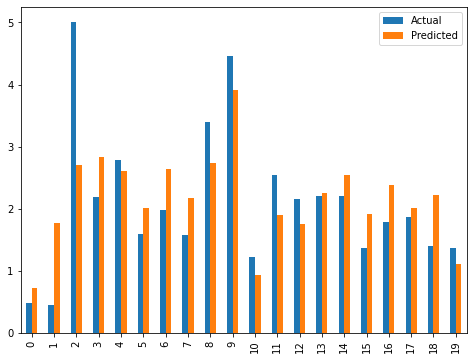

In [ ]:
# ytest = np.array()
# fig, ax = plt.subplots()
# plt.figure(figsize = (9,5))
ytest=y_test.values.reshape(len(y_test))

ytest
df1 = pd.DataFrame({'Actual': ytest[:20].flatten(), 'Predicted': y_predicted[:20].flatten()})
df1.plot(kind='bar',figsize=(8, 6))


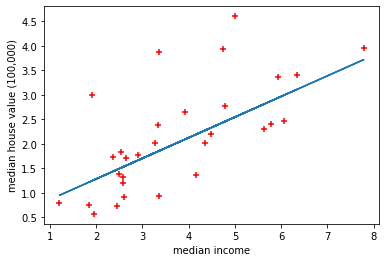

In [ ]:
plt.xlabel('median income')
plt.ylabel('median house value (100,000)')

plt.scatter(X_test[:30],y_test[:30], color='red', marker='+')
plt.plot(X_test[:30],linear_regression.predict(X_test)[:30])